In [1]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance


In [2]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=fc357691bfa56910df62862359f714292d07cbb0c8ca671cb57bd6cc789691a8
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [4]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4461    0  4461    0     0  11719      0 --:--:-- --:--:-- --:--:-- 11739
100  517k  100  517k    0     0   630k      0 --:--:-- --:--:-- --:--:-- 4514k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4489    0  4489    0     0  12139      0 --:--:-- --:--:-- --:--:-- 12165
100  392k  100  392k    0     0   475k      0 --:--:-- --:--:-- --:--:-- 4908k


In [5]:
import talib as ta
import numpy as np
import pandas as pd
import yfinance as yf


# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.stats import uniform

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

#Stat
from scipy import stats


## Import Historical price data of tisco stock

In [6]:
"""tisco = yf.Ticker('tisco.bk')
interval = '15m'
start = '2023-11-6'
end = '2023-12-30'
tisco_price_df = tisco.history(interval=interval,start=start,end=end)
tisco_price_df"""


"tisco = yf.Ticker('tisco.bk')\ninterval = '15m'\nstart = '2023-11-6'\nend = '2023-12-30'\ntisco_price_df = tisco.history(interval=interval,start=start,end=end)\ntisco_price_df"

In [7]:
#Import data
tisco_price_df= pd.read_csv('/content/TISCO_6-11 to 08_01.csv')
tisco_price_df

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-11-06 10:00:00+07:00,97.50,97.75,97.25,97.50,69745,0,0
1,2023-11-06 10:15:00+07:00,97.25,97.50,97.25,97.50,167785,0,0
2,2023-11-06 10:30:00+07:00,97.50,97.75,97.25,97.50,105120,0,0
3,2023-11-06 10:45:00+07:00,97.50,97.50,97.25,97.50,23087,0,0
4,2023-11-06 11:00:00+07:00,97.50,97.50,97.25,97.25,191142,0,0
...,...,...,...,...,...,...,...,...
755,2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995,0,0
756,2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794,0,0
757,2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503,0,0
758,2024-01-05 16:00:00+07:00,100.50,100.50,100.00,100.50,64386,0,0


In [8]:
tisco_price_df.set_index('Datetime', inplace=True)
tisco_price_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-11-06 10:00:00+07:00,97.50,97.75,97.25,97.50,69745,0,0
2023-11-06 10:15:00+07:00,97.25,97.50,97.25,97.50,167785,0,0
2023-11-06 10:30:00+07:00,97.50,97.75,97.25,97.50,105120,0,0
2023-11-06 10:45:00+07:00,97.50,97.50,97.25,97.50,23087,0,0
2023-11-06 11:00:00+07:00,97.50,97.50,97.25,97.25,191142,0,0
...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995,0,0
2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794,0,0
2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503,0,0


In [9]:
tisco_price_df= tisco_price_df[["Open","High","Low","Close","Volume"]]
tisco_price_df


,Open,High,Low,Close,Volume
Datetime,,,,,
2023-11-06 10:00:00+07:00,97.50,97.75,97.25,97.50,69745
2023-11-06 10:15:00+07:00,97.25,97.50,97.25,97.50,167785
2023-11-06 10:30:00+07:00,97.50,97.75,97.25,97.50,105120
2023-11-06 10:45:00+07:00,97.50,97.50,97.25,97.50,23087
2023-11-06 11:00:00+07:00,97.50,97.50,97.25,97.25,191142
...,...,...,...,...,...
2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995
2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794
2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503


## Define features


In [10]:
#Moving Average
tisco_price_df['SME'] = tisco_price_df['Close'].rolling(window=10).mean()
tisco_price_df

<ipython-input-10-f4f002f22198>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tisco_price_df['SME'] = tisco_price_df['Close'].rolling(window=10).mean()


,Open,High,Low,Close,Volume,SME
Datetime,,,,,,
2023-11-06 10:00:00+07:00,97.50,97.75,97.25,97.50,69745,NaN
2023-11-06 10:15:00+07:00,97.25,97.50,97.25,97.50,167785,NaN
2023-11-06 10:30:00+07:00,97.50,97.75,97.25,97.50,105120,NaN
2023-11-06 10:45:00+07:00,97.50,97.50,97.25,97.50,23087,NaN
2023-11-06 11:00:00+07:00,97.50,97.50,97.25,97.25,191142,NaN
...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995,100.45
2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794,100.45
2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503,100.45


In [11]:
#RSI
tisco_price_df['RSI'] = ta.RSI(np.array(tisco_price_df['Close']), timeperiod =14)
tisco_price_df

,Open,High,Low,Close,Volume,SME,RSI
Datetime,,,,,,,
2023-11-06 10:00:00+07:00,97.50,97.75,97.25,97.50,69745,NaN,NaN
2023-11-06 10:15:00+07:00,97.25,97.50,97.25,97.50,167785,NaN,NaN
2023-11-06 10:30:00+07:00,97.50,97.75,97.25,97.50,105120,NaN,NaN
2023-11-06 10:45:00+07:00,97.50,97.50,97.25,97.50,23087,NaN,NaN
2023-11-06 11:00:00+07:00,97.50,97.50,97.25,97.25,191142,NaN,NaN
...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995,100.45,59.166108
2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794,100.45,59.166108
2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503,100.45,59.166108


In [12]:
#Stochastic Oscillator
# Define periods
k_period = 14
d_period = 3
# Adds a "n_high" column with max value of previous 14 periods
tisco_price_df['n_high'] = tisco_price_df['High'].rolling(k_period).max()
# Adds an "n_low" column with min value of previous 14 periods
tisco_price_df['n_low'] = tisco_price_df['Low'].rolling(k_period).min()
# Uses the min/max values to calculate the %k (as a percentage)
tisco_price_df['%K'] = (tisco_price_df['Close'] - tisco_price_df['n_low']) * 100 / (tisco_price_df['n_high'] - tisco_price_df['n_low'])
# Uses the %k to calculates a SMA over the past 3 values of %k
tisco_price_df['%D'] = tisco_price_df['%K'].rolling(d_period).mean()
tisco_price_df["Stochastic"] = tisco_price_df['%K'] - tisco_price_df['%D']

tisco_price_df =tisco_price_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SME', 'RSI','%K', '%D', 'Stochastic']]

tisco_price_df


,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic
Datetime,,,,,,,,,,
2023-11-06 10:00:00+07:00,97.50,97.75,97.25,97.50,69745,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:15:00+07:00,97.25,97.50,97.25,97.50,167785,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:30:00+07:00,97.50,97.75,97.25,97.50,105120,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:45:00+07:00,97.50,97.50,97.25,97.50,23087,NaN,NaN,NaN,NaN,NaN
2023-11-06 11:00:00+07:00,97.50,97.50,97.25,97.25,191142,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995,100.45,59.166108,100.0,77.777778,22.222222
2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794,100.45,59.166108,100.0,100.000000,0.000000
2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503,100.45,59.166108,100.0,100.000000,0.000000


In [13]:
#Stochastic Correlation
tisco_price_df['Sto_Corr'] = tisco_price_df['Close'].rolling(window=14).corr(tisco_price_df['Stochastic'])

tisco_price_df



<ipython-input-13-e1024ad7bd53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tisco_price_df['Sto_Corr'] = tisco_price_df['Close'].rolling(window=14).corr(tisco_price_df['Stochastic'])


,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr
Datetime,,,,,,,,,,,
2023-11-06 10:00:00+07:00,97.50,97.75,97.25,97.50,69745,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:15:00+07:00,97.25,97.50,97.25,97.50,167785,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:30:00+07:00,97.50,97.75,97.25,97.50,105120,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:45:00+07:00,97.50,97.50,97.25,97.50,23087,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 11:00:00+07:00,97.50,97.50,97.25,97.25,191142,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995,100.45,59.166108,100.0,77.777778,22.222222,0.742247
2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794,100.45,59.166108,100.0,100.000000,0.000000,0.778805
2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503,100.45,59.166108,100.0,100.000000,0.000000,0.768066


In [14]:
#Volatility
ret = 100 * (tisco_price_df.pct_change()[1:]['Close'])
tisco_price_df['Volatility'] = ret.rolling(5).std()
tisco_price_df

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility
Datetime,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,97.50,97.75,97.25,97.50,69745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:15:00+07:00,97.25,97.50,97.25,97.50,167785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:30:00+07:00,97.50,97.75,97.25,97.50,105120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 10:45:00+07:00,97.50,97.50,97.25,97.50,23087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-06 11:00:00+07:00,97.50,97.50,97.25,97.25,191142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995,100.45,59.166108,100.0,77.777778,22.222222,0.742247,0.352675
2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794,100.45,59.166108,100.0,100.000000,0.000000,0.778805,0.352675
2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503,100.45,59.166108,100.0,100.000000,0.000000,0.768066,0.352675


In [15]:
"""#Index Price
set50 = yf.Ticker('^SET50.BK')
interval = '15m'
start = '2023-11-6'
end = '2023-12-30'
set50_df = set50.history(interval=interval,start=start,end=end)"""


"#Index Price\nset50 = yf.Ticker('^SET50.BK')\ninterval = '15m'\nstart = '2023-11-6'\nend = '2023-12-30'\nset50_df = set50.history(interval=interval,start=start,end=end)"

In [16]:
#Index Price
set50 = pd.read_csv("/content/set50_6-11 to 01_08.csv")

In [17]:
set50.set_index('Datetime', inplace=True)
set50

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-11-06 10:00:00+07:00,884.099976,886.109985,883.719971,884.929993,0,0,0
2023-11-06 10:15:00+07:00,885.289978,885.289978,882.469971,882.830017,0,0,0
2023-11-06 10:30:00+07:00,882.650024,883.309998,881.510010,882.760010,0,0,0
2023-11-06 10:45:00+07:00,882.950012,882.950012,880.140015,881.090027,0,0,0
2023-11-06 11:00:00+07:00,880.669983,880.690002,877.570007,879.479981,0,0,0
...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,876.359985,876.760010,874.390015,875.049988,0,0,0
2024-01-05 15:30:00+07:00,875.840027,876.039978,874.270019,875.270019,0,0,0
2024-01-05 15:45:00+07:00,875.299988,876.049988,874.179993,874.760010,0,0,0


In [18]:
tisco_price_df["Index_Price"] = set50['Close']
tisco_price_df

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price
Datetime,,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,97.50,97.75,97.25,97.50,69745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,884.929993
2023-11-06 10:15:00+07:00,97.25,97.50,97.25,97.50,167785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882.830017
2023-11-06 10:30:00+07:00,97.50,97.75,97.25,97.50,105120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882.760010
2023-11-06 10:45:00+07:00,97.50,97.50,97.25,97.50,23087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.090027
2023-11-06 11:00:00+07:00,97.50,97.50,97.25,97.25,191142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,879.479981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995,100.45,59.166108,100.0,77.777778,22.222222,0.742247,0.352675,875.049988
2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794,100.45,59.166108,100.0,100.000000,0.000000,0.778805,0.352675,875.270019
2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503,100.45,59.166108,100.0,100.000000,0.000000,0.768066,0.352675,874.760010


In [19]:
#MACD


# # Calculate MACD values using the pandas_ta library
# df.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)

# Get the 26-day EMA of the closing price
k = tisco_price_df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()

# Get the 12-day EMA of the closing price
d = tisco_price_df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()

# Subtract the 26-day EMA from the 12-Day EMA to get the MACD
macd = k - d

# Get the 9-Day EMA of the MACD for the Trigger line
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()

# Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
macd_h = macd - macd_s

# Add all of our new values for the MACD to the dataframe
tisco_price_df['MACD_Con_Di'] = tisco_price_df.index.map(macd_h)
tisco_price_df



,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di
Datetime,,,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,97.50,97.75,97.25,97.50,69745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,884.929993,NaN
2023-11-06 10:15:00+07:00,97.25,97.50,97.25,97.50,167785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882.830017,NaN
2023-11-06 10:30:00+07:00,97.50,97.75,97.25,97.50,105120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882.760010,NaN
2023-11-06 10:45:00+07:00,97.50,97.50,97.25,97.50,23087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.090027,NaN
2023-11-06 11:00:00+07:00,97.50,97.50,97.25,97.25,191142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,879.479981,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995,100.45,59.166108,100.0,77.777778,22.222222,0.742247,0.352675,875.049988,0.006607
2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794,100.45,59.166108,100.0,100.000000,0.000000,0.778805,0.352675,875.270019,0.004366
2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503,100.45,59.166108,100.0,100.000000,0.000000,0.768066,0.352675,874.760010,0.001007


In [20]:
# SAR
tisco_price_df['SAR'] = ta.SAR(tisco_price_df.High.values, tisco_price_df.Low.values, acceleration = 0.02, maximum = 0.2)
tisco_price_df

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
Datetime,,,,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,97.50,97.75,97.25,97.50,69745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,884.929993,NaN,NaN
2023-11-06 10:15:00+07:00,97.25,97.50,97.25,97.50,167785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882.830017,NaN,97.500000
2023-11-06 10:30:00+07:00,97.50,97.75,97.25,97.50,105120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882.760010,NaN,97.250000
2023-11-06 10:45:00+07:00,97.50,97.50,97.25,97.50,23087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.090027,NaN,97.750000
2023-11-06 11:00:00+07:00,97.50,97.50,97.25,97.25,191142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,879.479981,NaN,97.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995,100.45,59.166108,100.0,77.777778,22.222222,0.742247,0.352675,875.049988,0.006607,99.707243
2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794,100.45,59.166108,100.0,100.000000,0.000000,0.778805,0.352675,875.270019,0.004366,99.738954
2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503,100.45,59.166108,100.0,100.000000,0.000000,0.768066,0.352675,874.760010,0.001007,99.769396


## EDA and prepare data

Check data type

In [21]:
tisco_price_df = tisco_price_df.astype('float64')
tisco_price_df.dtypes

Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
SME            float64
RSI            float64
%K             float64
%D             float64
Stochastic     float64
Sto_Corr       float64
Volatility     float64
Index_Price    float64
MACD_Con_Di    float64
SAR            float64
dtype: object

In [22]:
# Check if there are any infinity values in each column
# Check for infinity values in the DataFrame
is_infinity = np.isinf(tisco_price_df)
for column in tisco_price_df.columns:
    has_infinity = is_infinity[column].any()
    if has_infinity:
        print(f"Column '{column}' contains infinity values.")
    else:
        print(f"Column '{column}' does not contain infinity values.")

Column 'Open' does not contain infinity values.
Column 'High' does not contain infinity values.
Column 'Low' does not contain infinity values.
Column 'Close' does not contain infinity values.
Column 'Volume' does not contain infinity values.
Column 'SME' does not contain infinity values.
Column 'RSI' does not contain infinity values.
Column '%K' does not contain infinity values.
Column '%D' does not contain infinity values.
Column 'Stochastic' does not contain infinity values.
Column 'Sto_Corr' contains infinity values.
Column 'Volatility' does not contain infinity values.
Column 'Index_Price' does not contain infinity values.
Column 'MACD_Con_Di' does not contain infinity values.
Column 'SAR' does not contain infinity values.


Fill infinity value

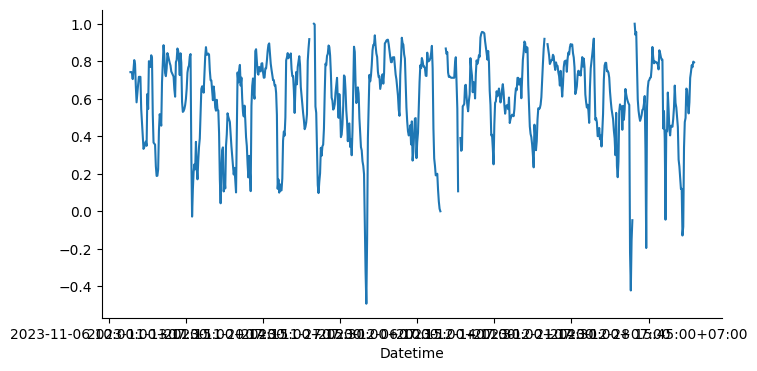

In [23]:
from matplotlib import pyplot as plt
tisco_price_df['Sto_Corr'].plot(kind='line', figsize=(8, 4))
plt.gca().spines[['top', 'right']].set_visible(False)

In [24]:
def replace_negative_infinity(df, replacement_value):
    # Replace negative infinity with the specified value
    df.replace(-np.inf, replacement_value, inplace=True)
    return df

replacement_value = -1.0  # You can replace this with any value you want

result = replace_negative_infinity(tisco_price_df, replacement_value)


def replace_positive_infinity(df, replacement_value):
    # Replace negative infinity with the specified value
    df.replace(np.inf, replacement_value, inplace=True)
    return df

replacement_value = 1.0  # You can replace this with any value you want

result = replace_positive_infinity(tisco_price_df, replacement_value)

# Check for infinity values in the DataFrame
is_infinity = np.isinf(result)
for column in result.columns:
    has_infinity = is_infinity[column].any()
    if has_infinity:
        print(f"Column '{column}' contains infinity values.")
    else:
        print(f"Column '{column}' does not contain infinity values.")


tisco_price_df = result
tisco_price_df

Column 'Open' does not contain infinity values.
Column 'High' does not contain infinity values.
Column 'Low' does not contain infinity values.
Column 'Close' does not contain infinity values.
Column 'Volume' does not contain infinity values.
Column 'SME' does not contain infinity values.
Column 'RSI' does not contain infinity values.
Column '%K' does not contain infinity values.
Column '%D' does not contain infinity values.
Column 'Stochastic' does not contain infinity values.
Column 'Sto_Corr' does not contain infinity values.
Column 'Volatility' does not contain infinity values.
Column 'Index_Price' does not contain infinity values.
Column 'MACD_Con_Di' does not contain infinity values.
Column 'SAR' does not contain infinity values.


,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
Datetime,,,,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,97.50,97.75,97.25,97.50,69745.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,884.929993,NaN,NaN
2023-11-06 10:15:00+07:00,97.25,97.50,97.25,97.50,167785.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882.830017,NaN,97.500000
2023-11-06 10:30:00+07:00,97.50,97.75,97.25,97.50,105120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882.760010,NaN,97.250000
2023-11-06 10:45:00+07:00,97.50,97.50,97.25,97.50,23087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.090027,NaN,97.750000
2023-11-06 11:00:00+07:00,97.50,97.50,97.25,97.25,191142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,879.479981,NaN,97.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995.0,100.45,59.166108,100.0,77.777778,22.222222,0.742247,0.352675,875.049988,0.006607,99.707243
2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794.0,100.45,59.166108,100.0,100.000000,0.000000,0.778805,0.352675,875.270019,0.004366,99.738954
2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503.0,100.45,59.166108,100.0,100.000000,0.000000,0.768066,0.352675,874.760010,0.001007,99.769396


Check Nan Value

In [25]:
def check_nan_data(dataframe):
    nan_counts = dataframe.isna().sum()
    nan_columns = nan_counts[nan_counts > 0]

    if len(nan_columns) == 0:
        print("No NaN values found in any column.")
    else:
        print("NaN values found in the following columns:")
        for column, count in nan_columns.items():
            print(f"{column}: {count} NaN values")

check_nan_data(tisco_price_df)

NaN values found in the following columns:
SME: 9 NaN values
RSI: 14 NaN values
%K: 13 NaN values
%D: 15 NaN values
Stochastic: 15 NaN values
Sto_Corr: 30 NaN values
Volatility: 5 NaN values
Index_Price: 2 NaN values
MACD_Con_Di: 33 NaN values
SAR: 1 NaN values


In [26]:
# Check index of Nan Value
def get_nan_indices_for_column(dataframe, column_name):
    nan_indices = dataframe[dataframe[column_name].isna()].index

    if len(nan_indices) == 0:
        print(f"No NaN values found in the '{column_name}' column.")
    else:
        print(f"Indices of NaN values in the '{column_name}' column:")
        for index in nan_indices:
            print(index)

get_nan_indices_for_column(tisco_price_df, "Sto_Corr")



Indices of NaN values in the 'Sto_Corr' column:
2023-11-06 10:00:00+07:00
2023-11-06 10:15:00+07:00
2023-11-06 10:30:00+07:00
2023-11-06 10:45:00+07:00
2023-11-06 11:00:00+07:00
2023-11-06 11:15:00+07:00
2023-11-06 11:30:00+07:00
2023-11-06 11:45:00+07:00
2023-11-06 12:00:00+07:00
2023-11-06 12:15:00+07:00
2023-11-06 14:15:00+07:00
2023-11-06 14:30:00+07:00
2023-11-06 14:45:00+07:00
2023-11-06 15:00:00+07:00
2023-11-06 15:15:00+07:00
2023-11-06 15:30:00+07:00
2023-11-06 15:45:00+07:00
2023-11-06 16:00:00+07:00
2023-11-06 16:15:00+07:00
2023-11-07 10:00:00+07:00
2023-11-07 10:15:00+07:00
2023-11-07 10:30:00+07:00
2023-11-07 10:45:00+07:00
2023-11-07 11:00:00+07:00
2023-11-07 11:15:00+07:00
2023-11-07 11:30:00+07:00
2023-11-07 11:45:00+07:00
2023-11-07 12:00:00+07:00
2023-12-19 16:00:00+07:00
2023-12-27 15:30:00+07:00


EDA data distribution for 'Index_Price'

Shapiro-Wilk test statistic: nan, p-value: 1.0
The data follows a normal distribution (Do not reject H0)


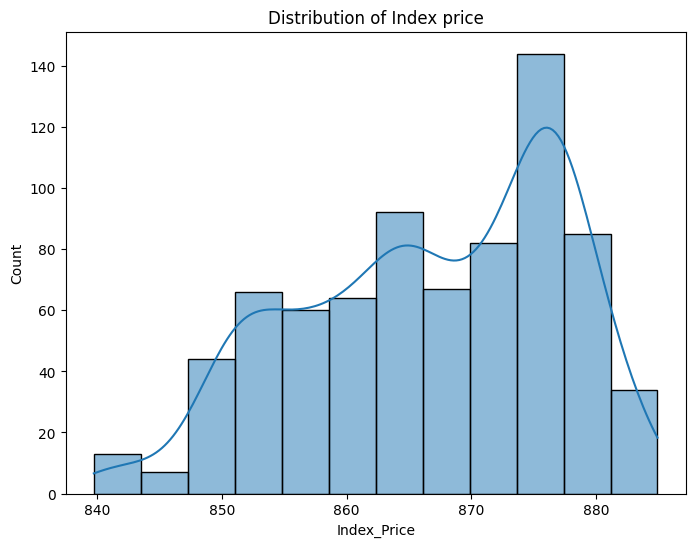

In [27]:
#Data distribution for 'Index_Price'

# Check normality using Shapiro-Wilk test
stat, p_value = stats.shapiro(tisco_price_df['Index_Price'])
print(f'Shapiro-Wilk test statistic: {stat}, p-value: {p_value}')

# Set significance level
alpha = 0.05

# Check normality based on p-value
if p_value > alpha:
    print("The data follows a normal distribution (Do not reject H0)")
else:
    print("The data does not follow a normal distribution (Do not reject H0)")

# Visualize distribution
plt.figure(figsize=(8, 6))
sns.histplot(tisco_price_df['Index_Price'], kde=True)
plt.title("Distribution of Index price")
plt.show()

Plot graph to find relationship between Index price and ERW closing price

Original DataFrame:
                             Open    High     Low   Close    Volume     SME  \
Datetime                                                                      
2023-11-06 10:00:00+07:00   97.50   97.75   97.25   97.50   69745.0     NaN   
2023-11-06 10:15:00+07:00   97.25   97.50   97.25   97.50  167785.0     NaN   
2023-11-06 10:30:00+07:00   97.50   97.75   97.25   97.50  105120.0     NaN   
2023-11-06 10:45:00+07:00   97.50   97.50   97.25   97.50   23087.0     NaN   
2023-11-06 11:00:00+07:00   97.50   97.50   97.25   97.25  191142.0     NaN   
...                           ...     ...     ...     ...       ...     ...   
2024-01-05 15:15:00+07:00  100.00  100.50  100.00  100.50   30995.0  100.45   
2024-01-05 15:30:00+07:00  100.00  100.50  100.00  100.50   66794.0  100.45   
2024-01-05 15:45:00+07:00  100.50  100.50  100.00  100.50   55503.0  100.45   
2024-01-05 16:00:00+07:00  100.50  100.50  100.00  100.50   64386.0  100.45   
2024-01-05 16:15:00+07:00  100.5

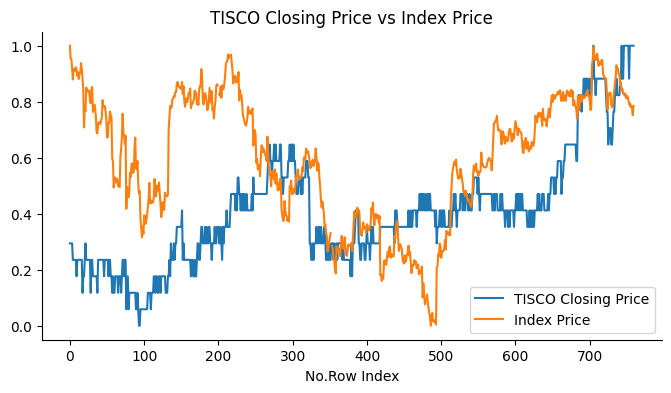

In [28]:
# Function to normalize the DataFrame
def normalize_dataframe(df):
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_normalized

# Normalize the DataFrame
normalized_df = normalize_dataframe(tisco_price_df)

# Display the original and normalized DataFrames
print("Original DataFrame:")
print(tisco_price_df)
print("\nNormalized DataFrame:")
print(normalized_df)

#Plot Closing price of ERW stock and Index price
# Assuming normalized_df is your DataFrame
ax = normalized_df[['Close', 'Index_Price']].plot(kind='line', figsize=(8, 4), title='TISCO Closing Price vs Index Price')
ax.spines[['top', 'right']].set_visible(False)

# Adding x-axis label
plt.xlabel('No.Row Index')

# Adding legends for each line
ax.legend(['TISCO Closing Price', 'Index Price'])

plt.show()

Drop Nan data for SME,RSI,Stochastic,Volatility,and MACD





In [29]:
#Check dataframe
tisco_price_df

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
Datetime,,,,,,,,,,,,,,,
2023-11-06 10:00:00+07:00,97.50,97.75,97.25,97.50,69745.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,884.929993,NaN,NaN
2023-11-06 10:15:00+07:00,97.25,97.50,97.25,97.50,167785.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882.830017,NaN,97.500000
2023-11-06 10:30:00+07:00,97.50,97.75,97.25,97.50,105120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882.760010,NaN,97.250000
2023-11-06 10:45:00+07:00,97.50,97.50,97.25,97.50,23087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.090027,NaN,97.750000
2023-11-06 11:00:00+07:00,97.50,97.50,97.25,97.25,191142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,879.479981,NaN,97.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995.0,100.45,59.166108,100.0,77.777778,22.222222,0.742247,0.352675,875.049988,0.006607,99.707243
2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794.0,100.45,59.166108,100.0,100.000000,0.000000,0.778805,0.352675,875.270019,0.004366,99.738954
2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503.0,100.45,59.166108,100.0,100.000000,0.000000,0.768066,0.352675,874.760010,0.001007,99.769396


In [30]:
tisco_price_df.reset_index(drop=False, inplace=True)
tisco_price_df

,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
0,2023-11-06 10:00:00+07:00,97.50,97.75,97.25,97.50,69745.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,884.929993,NaN,NaN
1,2023-11-06 10:15:00+07:00,97.25,97.50,97.25,97.50,167785.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882.830017,NaN,97.500000
2,2023-11-06 10:30:00+07:00,97.50,97.75,97.25,97.50,105120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,882.760010,NaN,97.250000
3,2023-11-06 10:45:00+07:00,97.50,97.50,97.25,97.50,23087.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.090027,NaN,97.750000
4,2023-11-06 11:00:00+07:00,97.50,97.50,97.25,97.25,191142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,879.479981,NaN,97.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995.0,100.45,59.166108,100.0,77.777778,22.222222,0.742247,0.352675,875.049988,0.006607,99.707243
756,2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794.0,100.45,59.166108,100.0,100.000000,0.000000,0.778805,0.352675,875.270019,0.004366,99.738954
757,2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503.0,100.45,59.166108,100.0,100.000000,0.000000,0.768066,0.352675,874.760010,0.001007,99.769396
758,2024-01-05 16:00:00+07:00,100.50,100.50,100.00,100.50,64386.0,100.45,59.166108,100.0,100.000000,0.000000,0.797761,0.223607,873.700012,-0.002881,99.798620


In [31]:
tisco_price_df = tisco_price_df.drop(range(33))
tisco_price_df.reset_index(drop=False, inplace=True)
tisco_price_df


,index,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
0,33,2023-11-07 15:15:00+07:00,97.00,97.00,96.75,97.00,161010.0,97.125,42.975549,33.333333,33.333333,0.000000,0.805991,0.282697,875.429993,-0.016393,97.427941
1,34,2023-11-07 15:30:00+07:00,97.00,97.25,96.75,97.00,162507.0,97.100,42.975549,33.333333,33.333333,0.000000,0.784901,0.114965,874.780029,-0.016267,97.414382
2,35,2023-11-07 15:45:00+07:00,97.00,97.00,96.75,97.00,79403.0,97.075,42.975549,33.333333,33.333333,0.000000,0.670564,0.114965,873.419983,-0.014832,97.401094
3,36,2023-11-07 16:00:00+07:00,97.00,97.00,96.50,97.00,480264.0,97.050,42.975549,66.666667,44.444444,22.222222,0.580784,0.000000,870.979981,-0.012619,97.388072
4,37,2023-11-07 16:15:00+07:00,96.75,97.00,96.75,96.75,59041.0,97.000,35.735509,33.333333,44.444444,-11.111111,0.629504,0.115261,870.760010,-0.025959,97.352549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,755,2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995.0,100.450,59.166108,100.000000,77.777778,22.222222,0.742247,0.352675,875.049988,0.006607,99.707243
723,756,2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794.0,100.450,59.166108,100.000000,100.000000,0.000000,0.778805,0.352675,875.270019,0.004366,99.738954
724,757,2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503.0,100.450,59.166108,100.000000,100.000000,0.000000,0.768066,0.352675,874.760010,0.001007,99.769396
725,758,2024-01-05 16:00:00+07:00,100.50,100.50,100.00,100.50,64386.0,100.450,59.166108,100.000000,100.000000,0.000000,0.797761,0.223607,873.700012,-0.002881,99.798620


Imputation for Price Index

In [32]:
# Choose the column with missing data
column_with_missing_data = 'Index_Price'

# Create a SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the specified column
tisco_price_df[column_with_missing_data] = imputer.fit_transform(tisco_price_df[[column_with_missing_data]])

tisco_price_df


,index,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
0,33,2023-11-07 15:15:00+07:00,97.00,97.00,96.75,97.00,161010.0,97.125,42.975549,33.333333,33.333333,0.000000,0.805991,0.282697,875.429993,-0.016393,97.427941
1,34,2023-11-07 15:30:00+07:00,97.00,97.25,96.75,97.00,162507.0,97.100,42.975549,33.333333,33.333333,0.000000,0.784901,0.114965,874.780029,-0.016267,97.414382
2,35,2023-11-07 15:45:00+07:00,97.00,97.00,96.75,97.00,79403.0,97.075,42.975549,33.333333,33.333333,0.000000,0.670564,0.114965,873.419983,-0.014832,97.401094
3,36,2023-11-07 16:00:00+07:00,97.00,97.00,96.50,97.00,480264.0,97.050,42.975549,66.666667,44.444444,22.222222,0.580784,0.000000,870.979981,-0.012619,97.388072
4,37,2023-11-07 16:15:00+07:00,96.75,97.00,96.75,96.75,59041.0,97.000,35.735509,33.333333,44.444444,-11.111111,0.629504,0.115261,870.760010,-0.025959,97.352549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,755,2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995.0,100.450,59.166108,100.000000,77.777778,22.222222,0.742247,0.352675,875.049988,0.006607,99.707243
723,756,2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794.0,100.450,59.166108,100.000000,100.000000,0.000000,0.778805,0.352675,875.270019,0.004366,99.738954
724,757,2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503.0,100.450,59.166108,100.000000,100.000000,0.000000,0.768066,0.352675,874.760010,0.001007,99.769396
725,758,2024-01-05 16:00:00+07:00,100.50,100.50,100.00,100.50,64386.0,100.450,59.166108,100.000000,100.000000,0.000000,0.797761,0.223607,873.700012,-0.002881,99.798620


Check NaN again

In [33]:
def check_nan_data(dataframe):
    nan_counts = dataframe.isna().sum()
    nan_columns = nan_counts[nan_counts > 0]

    if len(nan_columns) == 0:
        print("No NaN values found in any column.")
    else:
        print("NaN values found in the following columns:")
        for column, count in nan_columns.items():
            print(f"{column}: {count} NaN values")

check_nan_data(tisco_price_df)

NaN values found in the following columns:
Sto_Corr: 2 NaN values


Imputation for Sto_Corr

In [34]:
# Choose the column with missing data
column_with_missing_data = 'Sto_Corr'

# Create a SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the specified column
tisco_price_df[column_with_missing_data] = imputer.fit_transform(tisco_price_df[[column_with_missing_data]])

tisco_price_df

,index,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR
0,33,2023-11-07 15:15:00+07:00,97.00,97.00,96.75,97.00,161010.0,97.125,42.975549,33.333333,33.333333,0.000000,0.805991,0.282697,875.429993,-0.016393,97.427941
1,34,2023-11-07 15:30:00+07:00,97.00,97.25,96.75,97.00,162507.0,97.100,42.975549,33.333333,33.333333,0.000000,0.784901,0.114965,874.780029,-0.016267,97.414382
2,35,2023-11-07 15:45:00+07:00,97.00,97.00,96.75,97.00,79403.0,97.075,42.975549,33.333333,33.333333,0.000000,0.670564,0.114965,873.419983,-0.014832,97.401094
3,36,2023-11-07 16:00:00+07:00,97.00,97.00,96.50,97.00,480264.0,97.050,42.975549,66.666667,44.444444,22.222222,0.580784,0.000000,870.979981,-0.012619,97.388072
4,37,2023-11-07 16:15:00+07:00,96.75,97.00,96.75,96.75,59041.0,97.000,35.735509,33.333333,44.444444,-11.111111,0.629504,0.115261,870.760010,-0.025959,97.352549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,755,2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995.0,100.450,59.166108,100.000000,77.777778,22.222222,0.742247,0.352675,875.049988,0.006607,99.707243
723,756,2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794.0,100.450,59.166108,100.000000,100.000000,0.000000,0.778805,0.352675,875.270019,0.004366,99.738954
724,757,2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503.0,100.450,59.166108,100.000000,100.000000,0.000000,0.768066,0.352675,874.760010,0.001007,99.769396
725,758,2024-01-05 16:00:00+07:00,100.50,100.50,100.00,100.50,64386.0,100.450,59.166108,100.000000,100.000000,0.000000,0.797761,0.223607,873.700012,-0.002881,99.798620


In [35]:
# Check NaN again
def check_nan_data(dataframe):
    nan_counts = dataframe.isna().sum()
    nan_columns = nan_counts[nan_counts > 0]

    if len(nan_columns) == 0:
        print("No NaN values found in any column.")
    else:
        print("NaN values found in the following columns:")
        for column, count in nan_columns.items():
            print(f"{column}: {count} NaN values")

check_nan_data(tisco_price_df)

No NaN values found in any column.


## Define Target Variable
If closing price next 15 minute is higher than current closing price, then we will buy the stock (1), else we will sell it (-1).

In [36]:
tisco_price_df["y"] = np.where(tisco_price_df['Close'].shift(-1) > tisco_price_df['Close'],1,-1)
tisco_price_df

,index,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR,y
0,33,2023-11-07 15:15:00+07:00,97.00,97.00,96.75,97.00,161010.0,97.125,42.975549,33.333333,33.333333,0.000000,0.805991,0.282697,875.429993,-0.016393,97.427941,-1
1,34,2023-11-07 15:30:00+07:00,97.00,97.25,96.75,97.00,162507.0,97.100,42.975549,33.333333,33.333333,0.000000,0.784901,0.114965,874.780029,-0.016267,97.414382,-1
2,35,2023-11-07 15:45:00+07:00,97.00,97.00,96.75,97.00,79403.0,97.075,42.975549,33.333333,33.333333,0.000000,0.670564,0.114965,873.419983,-0.014832,97.401094,-1
3,36,2023-11-07 16:00:00+07:00,97.00,97.00,96.50,97.00,480264.0,97.050,42.975549,66.666667,44.444444,22.222222,0.580784,0.000000,870.979981,-0.012619,97.388072,-1
4,37,2023-11-07 16:15:00+07:00,96.75,97.00,96.75,96.75,59041.0,97.000,35.735509,33.333333,44.444444,-11.111111,0.629504,0.115261,870.760010,-0.025959,97.352549,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,755,2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995.0,100.450,59.166108,100.000000,77.777778,22.222222,0.742247,0.352675,875.049988,0.006607,99.707243,-1
723,756,2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794.0,100.450,59.166108,100.000000,100.000000,0.000000,0.778805,0.352675,875.270019,0.004366,99.738954,-1
724,757,2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503.0,100.450,59.166108,100.000000,100.000000,0.000000,0.768066,0.352675,874.760010,0.001007,99.769396,-1
725,758,2024-01-05 16:00:00+07:00,100.50,100.50,100.00,100.50,64386.0,100.450,59.166108,100.000000,100.000000,0.000000,0.797761,0.223607,873.700012,-0.002881,99.798620,-1


## Create Final Dataframe for Train Model

In [37]:
#tisco_price_df = erw_price_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SME', 'RSI', '%K', '%D',
#    'Stochastic', 'Volatility', 'Sto_Corr', 'Index_Price', 'MACD_Con_Di','SAR','y']]
tisco_price_df

,index,Datetime,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,Index_Price,MACD_Con_Di,SAR,y
0,33,2023-11-07 15:15:00+07:00,97.00,97.00,96.75,97.00,161010.0,97.125,42.975549,33.333333,33.333333,0.000000,0.805991,0.282697,875.429993,-0.016393,97.427941,-1
1,34,2023-11-07 15:30:00+07:00,97.00,97.25,96.75,97.00,162507.0,97.100,42.975549,33.333333,33.333333,0.000000,0.784901,0.114965,874.780029,-0.016267,97.414382,-1
2,35,2023-11-07 15:45:00+07:00,97.00,97.00,96.75,97.00,79403.0,97.075,42.975549,33.333333,33.333333,0.000000,0.670564,0.114965,873.419983,-0.014832,97.401094,-1
3,36,2023-11-07 16:00:00+07:00,97.00,97.00,96.50,97.00,480264.0,97.050,42.975549,66.666667,44.444444,22.222222,0.580784,0.000000,870.979981,-0.012619,97.388072,-1
4,37,2023-11-07 16:15:00+07:00,96.75,97.00,96.75,96.75,59041.0,97.000,35.735509,33.333333,44.444444,-11.111111,0.629504,0.115261,870.760010,-0.025959,97.352549,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,755,2024-01-05 15:15:00+07:00,100.00,100.50,100.00,100.50,30995.0,100.450,59.166108,100.000000,77.777778,22.222222,0.742247,0.352675,875.049988,0.006607,99.707243,-1
723,756,2024-01-05 15:30:00+07:00,100.00,100.50,100.00,100.50,66794.0,100.450,59.166108,100.000000,100.000000,0.000000,0.778805,0.352675,875.270019,0.004366,99.738954,-1
724,757,2024-01-05 15:45:00+07:00,100.50,100.50,100.00,100.50,55503.0,100.450,59.166108,100.000000,100.000000,0.000000,0.768066,0.352675,874.760010,0.001007,99.769396,-1
725,758,2024-01-05 16:00:00+07:00,100.50,100.50,100.00,100.50,64386.0,100.450,59.166108,100.000000,100.000000,0.000000,0.797761,0.223607,873.700012,-0.002881,99.798620,-1


## Explore imbalance target data

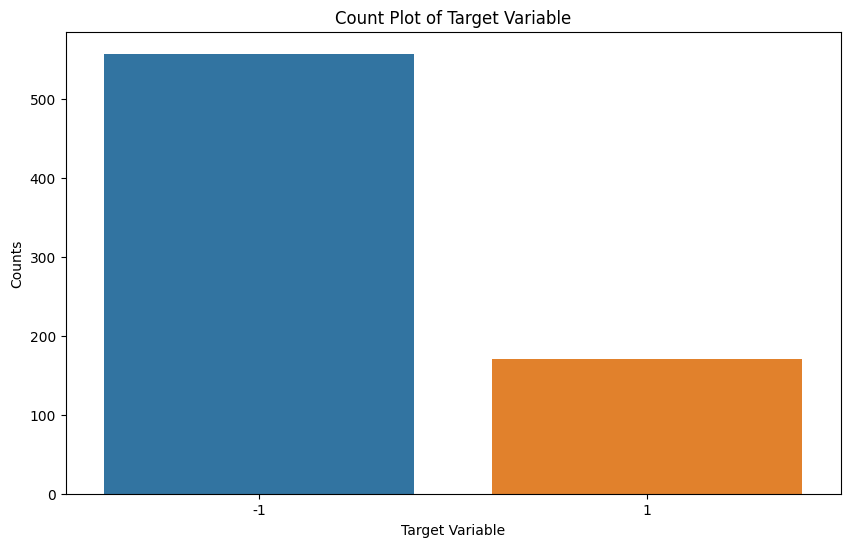

In [38]:
# Use Seaborn to count and plot
plt.figure(figsize=(10, 6))
sns.countplot(x='y', data= tisco_price_df)
plt.xlabel('Target Variable')
plt.ylabel('Counts')
plt.title('Count Plot of Target Variable')
plt.show()




## Data Splitting and scale data for train and test model

In [39]:
X = tisco_price_df[['Open', 'High', 'Low', 'Close', 'Volume', 'SME', 'RSI', '%K', '%D',
       'Stochastic', 'Sto_Corr', 'Volatility','MACD_Con_Di','SAR','Index_Price']]
y = tisco_price_df['y']

In [40]:
#Generate Train/Test dataset (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=123)

In [41]:
X_train

,Open,High,Low,Close,Volume,SME,RSI,%K,%D,Stochastic,Sto_Corr,Volatility,MACD_Con_Di,SAR,Index_Price
165,97.50,97.75,97.25,97.75,107747.0,97.525,56.229925,100.000000,66.666667,33.333333,0.787612,0.214293,0.001513,97.750000,878.700012
685,100.00,100.00,99.75,100.00,20583.0,100.000,55.116148,33.333333,38.888889,-5.555556,0.808455,0.000000,-0.030786,99.730978,880.299988
46,97.00,97.00,96.50,96.50,325397.0,96.975,41.337893,25.000000,50.000000,-25.000000,0.790788,0.467978,-0.036209,97.171600,860.469971
695,99.00,99.25,99.00,99.25,51696.0,99.550,35.771409,25.000000,25.000000,0.000000,0.404591,0.275585,-0.101312,100.150889,877.289978
295,97.50,97.50,97.25,97.25,80278.0,97.875,30.263133,0.000000,5.555556,-5.555556,0.324533,0.214765,-0.129622,98.454347,865.489990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,97.75,97.75,97.50,97.75,128169.0,97.550,58.245793,100.000000,83.333333,16.666667,0.881922,0.114670,0.020315,97.173233,848.030029
84,97.00,97.00,96.75,97.00,38150.0,96.825,59.705885,75.000000,66.666667,8.333333,0.344237,0.215952,0.044516,96.452770,862.340027
528,98.25,98.25,98.00,98.25,35510.0,98.225,50.672912,50.000000,50.000000,0.000000,0.608895,0.000000,-0.015573,98.470596,865.369995
217,98.25,98.50,98.00,98.25,44407.0,98.150,53.284274,66.666667,66.666667,0.000000,0.614562,0.312038,0.014756,97.822059,870.599976


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Scaled for whole dataset
total_scaler = StandardScaler(with_mean=True, with_std=True)
X_scaled = total_scaler.fit_transform(X)


## Modeling : Logistic Regression

The GridSearchCV was applied to determine optimal set of hyperparameters

Initialize a Logistic Regression and fit models to its GridSearchCV

In [44]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


logis_model = LogisticRegression(class_weight = 'balanced',max_iter=500,random_state =123,verbose =1)
solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
c_values = np.logspace(-2, 2, 100)
penalty = ['l2','elasticnet']


# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logis_model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
grid_search.fit(X_train_scaled , y_train)




[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5000 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File

GridSearchCV(cv=10, error_score=0,
             estimator=LogisticRegression(class_weight='balanced', max_iter=500,
                                          random_state=123, verbose=1),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                         'penalty': ['l2', 'elasticnet'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy')

## Get the best parameters and Evaluate Model with Test data set

In [45]:
from sklearn.metrics import roc_auc_score
# Get the best estimator from the search
best_logis_model = grid_search.best_estimator_

print("Best parameter")
print(grid_search.best_params_)



# Predict on the test set
logis_y_pred_prob = best_logis_model.predict_proba(X_test_scaled)[:, 1]


# Calculate ROC-AUC score
rf_roc_auc = roc_auc_score(y_test, logis_y_pred_prob)

# Print the ROC-AUC score
print(f"ROC-AUC Score: {rf_roc_auc}")



Best parameter
{'C': 43.287612810830616, 'penalty': 'l2', 'solver': 'liblinear'}
ROC-AUC Score: 0.835609243697479


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score


# Make predictions on the test set
logis_y_pred = best_logis_model.predict(X_test_scaled)

# Calculate the confusion matrix
logis_conf_matrix = confusion_matrix(y_test,logis_y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(logis_conf_matrix)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, logis_y_pred)
print("\nAccuracy:", accuracy)

#F-1 score
logis_f1_test = f1_score(y_test, logis_y_pred)
print('The f1 score for the testing data:', logis_f1_test)



Confusion Matrix:
[[85 27]
 [ 5 29]]

Accuracy: 0.7808219178082192
The f1 score for the testing data: 0.6444444444444445


<Figure size 800x600 with 0 Axes>

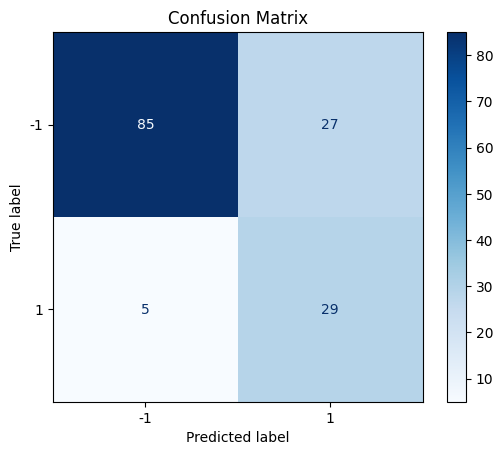

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

class_names = np.array([-1, 1])

# Display t che confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix= logis_conf_matrix , display_labels=class_names)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [48]:
print(metrics.classification_report(y_test, logis_y_pred))



              precision    recall  f1-score   support

          -1       0.94      0.76      0.84       112
           1       0.52      0.85      0.64        34

    accuracy                           0.78       146
   macro avg       0.73      0.81      0.74       146
weighted avg       0.85      0.78      0.80       146



Final Train model with whole data

In [49]:
final_logis_model = LogisticRegression(class_weight = 'balanced', max_iter=500,random_state =123,verbose =1,
                                       n_jobs=-1,solver = 'liblinear',C=43.287612810830616,penalty = 'l2')
final_logis_model.fit(X_scaled,y)
final_logis_model



[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


LogisticRegression(C=43.287612810830616, class_weight='balanced', max_iter=500,
                   n_jobs=-1, random_state=123, solver='liblinear', verbose=1)

Save scaler and model

In [50]:
import joblib
joblib.dump(total_scaler, 'tisco_standard_scaler')

['tisco_standard_scaler']

In [51]:
joblib.dump(final_logis_model, 'tisco_logistic_model')

['tisco_logistic_model']